In [8]:
import numpy as np
from scipy import signal

In [9]:
class fm_node:
    def __init__(self,duration,f,fs=44100,wave_type='sine',modulator=None,k=None,name=None):
        '''
        The initial setup of an FM node.

        Parameters
        ----------
        duration : float
                The length of the signal in seconds.
        f : int
                The frequency of the node (which you can treat it as the carrier
                frequency).
        fs : int 
                The sampling frequency, default is 44100.
        modulator : fm_node object.
                The fm_node which is used for modulate another fm_node.
        k : float
                The deviation constant.
        name : string
                The name of the node.
        '''
        self.fs = fs
        self.duration = duration
        self.wave_type = wave_type
        self.f = f
        self.k = k
        self.modulator = modulator
        self.t = np.arange(0,self.duration,1/self.fs)
        self.name = name

    def outcome(self):
        '''
        The outcome of the modulation.
        
        Returns
        -------
        y : array-like
            The output signal(mono) of an fm_node.
        '''
        if self.modulator is not None:
            y_m = self.modulator.outcome()
            y = [np.sin(2*np.pi*(self.f*self.t[i]+self.k*np.sum(y_m[:i])/self.fs)) for i in range(len(self.t))]
            return np.asarray(y)
        else:
            y = np.sin(2*np.pi*self.f*self.t)
            return y
     

In [10]:
m = fm_node(2,1,name='modulator')
c = fm_node(2,10,modulator=m,k=5)

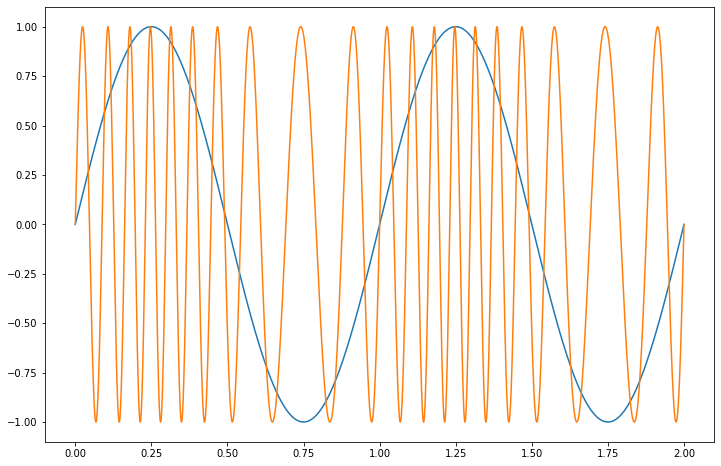

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(m.t,m.outcome())
plt.plot(c.t,c.outcome())
plt.show()

In [48]:
m = fm_node(2,150,name='modulator0')
m1 = fm_node(2,376,modulator=m,k=220,name='modulator1')
c = fm_node(2,880,modulator=m1,k=440,name='carrier')

sig = c.outcome()
stereo = np.tile(sig,(2,1))

In [50]:
from IPython import display
display.Audio(data=sig.T,rate=44100)

In [21]:
def envelope(duration,fs,attack,decay,sus_lv,sustain,release):
    '''
    A linear ADSR envelope.

    Parameters
    ----------
    duration : float
        The duration of the envelop.
    attack : float
        The attack time.
    decay : float
        The decay time.
    sus_lv : float
        The sustain level.
    sustain : float
        The sustain time.

    Return
    ------
    y : array like
        The envelop within duration.

    Example
    -------
    y = envelope(2,44100,0.3,0.2,-6,1.0,0.5)

    import matplotlib.pyplot as plt
    plt.figure()
    plt.plot(np.arange(0,2,1/44100),y)
    plt.show()
    '''
    amp_vec = np.linspace(0,1,int(attack*fs),endpoint=False)
    sus_lv = 1-10**(sus_lv/20)
    decay_vec = np.linspace(1,sus_lv,int(decay*fs),endpoint=False)
    sustain_vec = np.full(int(sustain*fs),sus_lv)
    release_vec = np.linspace(sus_lv,0,int(release*fs),endpoint=False)
    y = np.concatenate((amp_vec,decay_vec,sustain_vec,release_vec))
    return y


In [34]:
env_sig = np.multiply(sig,y)

In [35]:
from IPython import display
display.Audio(data=env_sig.T,rate=44100)